In [1]:
from thinkorswim import *
import matplotlib
import seaborn as sns
sns.set_context(font_scale=2.5)  
sns.set_style("ticks")
%matplotlib inline


In [6]:
import urllib.request
import datetime as dt
import pandas as pd

def get_google_data(symbol, period, window, exch = 'NYSE'):
    url_root = ('http://www.google.com/finance/getprices?i='
                + str(period) + '&p=' + str(window)
                + 'd&f=d,o,h,l,c,v&df=cpct&q=' + symbol.upper())
    response = urllib.request.urlopen(url_root)
    data=response.read().decode().split('\n')       #decode() required for Python 3
    data = [data[i].split(',') for i in range(len(data)-1)]
    header = data[0:7]
    data = data[7:]
    header[4][0] = header[4][0][8:]                 #get rid of 'Columns:' for label row
    df=pd.DataFrame(data, columns=header[4])
    df = df.dropna()                                #to fix the inclusion of more timezone shifts in the .csv returned from the goog api
    df.index = range(len(df))                       #fix the index from the previous dropna()

    ind=pd.Series(len(df))
    for i in range(len(df)):
        if df['DATE'].iloc[i][0] == 'a':
            anchor_time = dt.datetime.fromtimestamp(int(df['DATE'].iloc[i][1:]))  #make datetime object out of 'a' prefixed unix timecode
            ind[i]=anchor_time
        else:
            ind[i] = anchor_time +dt.timedelta(seconds = (period * int(df['DATE'].iloc[i])))
    df.index = ind

    df=df.drop('DATE', 1)

    for column in df.columns:                #shitty implementation because to_numeric is pd but does not accept df
        df[column]=pd.to_numeric(df[column])

    return df

In [7]:
data = get_google_data('SPY',60, 1)
data

,CLOSE,HIGH,LOW,OPEN,VOLUME
2017-06-22 09:30:00,242.970,242.970,242.950,242.960,154004
2017-06-22 09:31:00,243.030,243.030,242.930,242.970,160021
2017-06-22 09:32:00,242.950,243.030,242.950,243.030,17889
2017-06-22 09:33:00,242.830,242.960,242.810,242.950,66307
2017-06-22 09:34:00,242.860,242.880,242.820,242.840,78063
2017-06-22 09:35:00,242.910,242.950,242.830,242.850,64487
2017-06-22 09:36:00,242.800,242.920,242.760,242.920,58683
2017-06-22 09:37:00,242.720,242.790,242.690,242.790,50399
2017-06-22 09:38:00,242.710,242.740,242.660,242.720,104662
2017-06-22 09:39:00,242.730,242.790,242.710,242.710,36252


# underlying

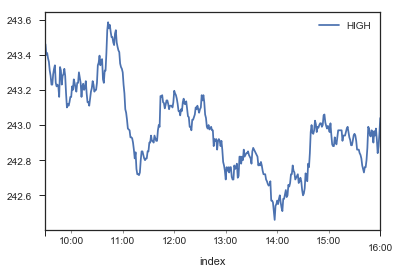

In [4]:
data.reset_index().plot(x=0,y=1)

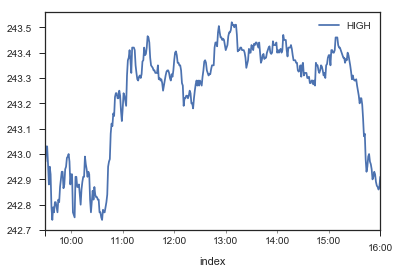

In [8]:
data.reset_index().plot(x=0,y=1)

In [9]:
import mibian

In [10]:
help(mibian.BS) 

Help on class BS in module mibian:

class BS(builtins.object)
 |  Black-Scholes
 |  Used for pricing European options on stocks without dividends
 |  
 |  BS([underlyingPrice, strikePrice, interestRate, daysToExpiration],                      volatility=x, callPrice=y, putPrice=z)
 |  
 |  eg: 
 |          c = mibian.BS([1.4565, 1.45, 1, 30], volatility=20)
 |          c.callPrice                             # Returns the call price
 |          c.putPrice                              # Returns the put price
 |          c.callDelta                             # Returns the call delta
 |          c.putDelta                              # Returns the put delta
 |          c.callDelta2                    # Returns the call dual delta
 |          c.putDelta2                             # Returns the put dual delta
 |          c.callTheta                             # Returns the call theta
 |          c.putTheta                              # Returns the put theta
 |          c.callRho     

In [23]:
test=mibian.BS([244.,232.5,0.96,6],volatility=20)

In [24]:
print(test.putPrice)

0.0694777882105


In [25]:
spy_tos = load_tos_datafile('../options/spy_20170622.txt')

(736502.375, 736502.7083333334)

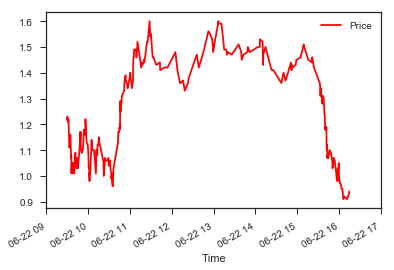

In [31]:
df = spy_tos.loc['2017-06-23',242,'C']
ax = df.reset_index().plot("Time",'Price',color='red')
ax.set_xlim('2017-06-22 9:00:00','2017-06-22 17:00:00')

In [78]:
spy_tos.loc['2017-06-23',242,'C']

,Option,Qty,Price,Exchange,Market,Delta,IV,Underlying,Condition
Time,,,,,,,,,
2017-06-22 09:30:00,23 JUN 17 242 C,1,1.22,BEST,1.16x1.22,0.73,12.32%,242.9500,NaN
2017-06-22 09:30:16,23 JUN 17 242 C,10,1.23,CBOE,1.21x1.24,0.73,12.55%,242.9500,NaN
2017-06-22 09:30:35,23 JUN 17 242 C,130,1.21,NYSE,1.20x1.21,0.74,12.08%,242.9500,NaN
2017-06-22 09:31:26,23 JUN 17 242 C,5,1.21,BEST,1.20x1.24,0.74,12.08%,242.9500,NaN
2017-06-22 09:31:53,23 JUN 17 242 C,1,1.22,NASDAQ,1.22x1.23,0.73,12.32%,242.9500,NaN
2017-06-22 09:33:06,23 JUN 17 242 C,11,1.11,NASDAQ,1.11x1.12,0.79,9.54%,242.9500,NaN
2017-06-22 09:33:06,23 JUN 17 242 C,53,1.11,NASDAQ,1.11x1.12,0.79,9.54%,242.9500,NaN
2017-06-22 09:33:49,23 JUN 17 242 C,5,1.12,C2,1.09x1.12,0.78,9.81%,242.9500,NaN
2017-06-22 09:34:09,23 JUN 17 242 C,1,1.11,BATS,1.11x1.13,0.79,9.54%,242.9500,NaN


In [68]:
test = mibian.BS([242.95,242,0.96,1],volatility=12.32)
test.callPrice

1.2151423199203464

In [80]:
test = mibian.BS([242.95,242,0.96,1],callPrice=1.22)
test.impliedVolatility

12.451171875

In [73]:
spy_gf = get_google_data('SPY',60, 1)


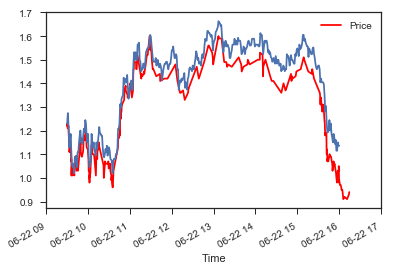

In [77]:
strike = 242
call_242_20170623 = []
for underlying in spy_gf.CLOSE.values:
    option_model = mibian.BS([underlying,strike,0.96,1],12.32)
    call_242_20170623.append(option_model.callPrice)
df = spy_tos.loc['2017-06-23',242,'C']
ax = df.reset_index().plot("Time",'Price',color='red')
ax.set_xlim('2017-06-22 9:00:00','2017-06-22 17:00:00')
ax.plot(spy_gf.index,call_242_20170623)

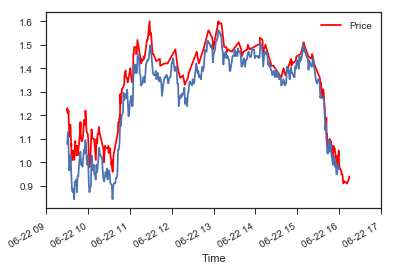

In [84]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1)

strike = 242
call_242_20170623 = []
for underlying in spy_gf.CLOSE.values:
    option_model = mibian.BS([underlying,strike,0.96,1],8.34)
    call_242_20170623.append(option_model.callPrice)
df = spy_tos.loc['2017-06-23',242,'C']
ax = df.reset_index().plot("Time",'Price',color='red',ax=axes)
ax.set_xlim('2017-06-22 9:00:00','2017-06-22 17:00:00')
ax.plot(spy_gf.index,call_242_20170623)

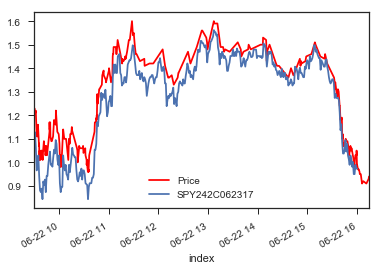

In [116]:
def call_price(underlying,strike,interestrate,daystomaturity,*args,**kwargs):
    option_model = mibian.BS([underlying,strike,interestrate,daystomaturity],*args,**kwargs)
    return option_model.callPrice

strike = 242
interestrate = 0.96
daystomaturity = 1
spy_gf['SPY242C062317'] = spy_gf.apply(lambda row: call_price(row['CLOSE'],strike,interestrate,daystomaturity,8.34),axis=1)

df = spy_tos.loc['2017-06-23',242,'C']
ax = df.reset_index().plot("Time",'Price',color='red')
ax.set_xlim('2017-06-22 9:00:00','2017-06-22 17:00:00')
spy_gf.reset_index().plot(x=0,y='SPY242C062317',ax=ax)